# **Notebook 1: Data Splitting & EDA**

## **Section 1: Setup & Data Loading**

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [108]:
target_col = "credit_score"
random_state = 1
pd.set_option('display.max_rows', 200)

In [109]:
raw_file_path = "../data/raw/credit_score_truncated_raw.csv"
train_full_file_path = "../data/raw/train_full.csv"
test_file_path = "../data/raw/test_holdout.csv"

In [110]:
# Read raw CSV without strict dtype enforcement for numeric columns
na_values = ["", "NA", "N/A", "NaN", "_______", "_", "!@9#%8"]
df = pd.read_csv(raw_file_path, na_values=na_values)

# Convert column names to lower case
df.columns = df.columns.str.lower()

In [111]:
df.sample(2, random_state=random_state).T

,4300,9536
customer_id,CUS_0x5158,CUS_0x9e8c
id,0x1e079,0x21535
month,August,August
name,Jasonb,Wilkesm
age,42,19
ssn,093-72-9364,715-55-8872
occupation,Developer,Teacher
annual_income,36806.84_,32089.33
monthly_inhand_salary,2827.236667,2882.110833
num_bank_accounts,6,4


Some numerical columns include `_`. For instance: `annual_income: 36806.84_`. This issue should be fixed before splitting.

In [112]:
# Fix numeric columns before split

# Define the schema for data types
string_cols = [
    "customer_id", "month", "name", "ssn", "id", # the "id" column includes garbage data, not identifiers
    "occupation", "type_of_loan", "credit_history_age",
    "credit_mix", "payment_of_min_amount", "payment_behaviour", "credit_score"
]

# identify numerical columns:
numerical_cols = []
for col in df.columns:
    if col not in string_cols:
        numerical_cols.append(col)

# Converting numerical columns
for col in numerical_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.strip("_"), # Remove underscore
        errors="coerce"                     # Malformd data -> NaN
    )

# Verify the fix
print(f"annual_income type: {df["annual_income"].dtype}")
print(f"age type: {df["age"].dtype}")
print(f"amount_invested_monthly type: {df["amount_invested_monthly"].dtype}")


annual_income type: float64
age type: int64
amount_invested_monthly type: float64


## **Section 2: Hold-Out Test Set Split**
**Purpose:** Create final evaluation set that is NEVER touched during development. All analysis, statistics, and decisions will be made using train_full ONLY. Test_holdout will NOT be used until final evaluation in Notebook 3.

In [113]:
df_train_full, df_test = train_test_split(df,
                                          train_size=0.8,
                                          random_state=random_state,
                                          stratify=df[target_col]
                                          )

df_train_full.to_csv(train_full_file_path, index=False)
df_test.to_csv(test_file_path, index=False)

In [114]:
print(f"Original data: {len(df)} rows")
print(f"Training set: {len(df_train_full)} rows ({len(df_train_full)/len(df)*100:.1f}%)")
print(f"Test set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")

Original data: 12500 rows
Training set: 10000 rows (80.0%)
Test set: 2500 rows (20.0%)


## **Section 3: Initial Data Assessment** (on train_full ONLY)
**🔴 FROM THIS POINT FORWARD, WORK ONLY WITH train_full**

#### Quick peek and structure
- df.head()                      # first few rows
- df.shape                       # (rows, cols)
- df.info()                      # dtypes, non-null counts, memory
- df.describe()                  # numeric summary (count, mean, std, pctiles)
- df.describe(include="all")     # include categorical summaries
- df.columns                     # column names
- df.dtypes                      # data types per column
- df.isna().sum()                # missing values per column
- df["customer_id"].value_counts()  # example categorical freq
- df.sample(5, random_state=1)   # random sample rows

In [115]:
df_train_full = pd.read_csv(train_full_file_path)

In [116]:
df_train_full.sample(n=2, random_state=random_state).T

,9953,3850
customer_id,CUS_0x9d72,CUS_0x150b
id,0x9d39,0x243b5
month,August,August
name,Breidthardtn,Pete Sweeneyw
age,41,21
ssn,916-18-3437,459-49-6464
occupation,Architect,Entrepreneur
annual_income,27026.95,17009.84
monthly_inhand_salary,2011.245833,1469.486667
num_bank_accounts,4,7


In [117]:
df["payment_of_min_amount"].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [118]:
df_train_full.shape

(10000, 28)

In [119]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  object 
 1   id                        10000 non-null  object 
 2   month                     10000 non-null  object 
 3   name                      10000 non-null  object 
 4   age                       10000 non-null  int64  
 5   ssn                       10000 non-null  object 
 6   occupation                9293 non-null   object 
 7   annual_income             10000 non-null  float64
 8   monthly_inhand_salary     10000 non-null  float64
 9   num_bank_accounts         10000 non-null  int64  
 10  num_credit_card           10000 non-null  int64  
 11  interest_rate             10000 non-null  int64  
 12  num_of_loan               10000 non-null  int64  
 13  type_of_loan              8849 non-null   object 
 14  delay_f

In [120]:
df_train_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,1.019930e+02,6.428820e+02,-5.000000e+02,25.000000,34.000000,42.000000,8.678000e+03
annual_income,10000.0,1.652378e+05,1.317424e+06,7.006035e+03,19465.568750,37578.215000,72610.627500,2.383470e+07
monthly_inhand_salary,10000.0,4.180462e+03,3.165028e+03,3.036454e+02,1623.583854,3097.016667,5948.233649,1.520463e+04
num_bank_accounts,10000.0,1.698010e+01,1.145141e+02,-1.000000e+00,3.000000,6.000000,8.000000,1.747000e+03
num_credit_card,10000.0,2.265230e+01,1.303335e+02,0.000000e+00,4.000000,6.000000,7.000000,1.499000e+03
interest_rate,10000.0,7.033760e+01,4.578097e+02,1.000000e+00,8.000000,14.000000,20.000000,5.773000e+03
num_of_loan,10000.0,2.729800e+00,6.052153e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.495000e+03
delay_from_due_date,10000.0,2.107630e+01,1.490480e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,10000.0,3.342110e+01,2.389944e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.281000e+03
changed_credit_limit,9799.0,1.045901e+01,6.824425e+00,-6.490000e+00,5.380000,9.430000,15.020000,3.485000e+01


In [121]:
df_train_full.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000,10000,CUS_0x2ff6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,10000,10000,0x188b9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,10000,1,August,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,10000,8438,Jessicad,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,101.993,642.882048,-500.0,25.0,34.0,42.0,8678.0
ssn,10000,9447,#F%$D@*&8,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,9293,15,Lawyer,650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,10000.0,NaN,NaN,NaN,165237.807782,1317424.170336,7006.035,19465.56875,37578.215,72610.6275,23834698.0
monthly_inhand_salary,10000.0,NaN,NaN,NaN,4180.461532,3165.028021,303.645417,1623.583854,3097.016667,5948.233649,15204.633333
num_bank_accounts,10000.0,NaN,NaN,NaN,16.9801,114.514105,-1.0,3.0,6.0,8.0,1747.0


In [122]:
# Identify columns with missing values and their percentages
missing = df_train_full.isna().sum()
missing_pct = (missing / len(df_train_full)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)
missing_df

,missing_count,missing_pct
credit_mix,2073,20.73
type_of_loan,1151,11.51
payment_behaviour,823,8.23
occupation,707,7.07
changed_credit_limit,201,2.01


#### Value counts for the target column

In [123]:
df_train_full["credit_score"].value_counts(dropna=False)

credit_score
Standard    5188
Poor        2882
Good        1930
Name: count, dtype: int64

#### Check for duplicates

In [124]:
df_train_full.duplicated(keep=False).value_counts()

False    10000
Name: count, dtype: int64

## **Section 4: Missing Value Analysis**

### Calculate Missing Value Statistics
Purpose: Quantitative analysis - "How much data is missing?"

Focus: Individual columns in isolation

Questions it answers:
- Which columns have the most missing values?
- What percentage of each column is missing?
- Should we drop columns with too many missing values?

In [125]:
def get_missing_distribution(df):
    """Quantitative analysis - how much is missing per column?"""
    missing_summary = pd.DataFrame({
        'missing_count': df.isnull().sum(),
        'missing_percentage': (df.isnull().sum() / len(df)) * 100
    }).sort_values('missing_percentage', ascending=False)

    # missing_summary = missing_summary[missing_summary["missing_count"] > 0]
    return missing_summary

# Usage
missing_by_column = get_missing_distribution(df_train_full)
print(missing_by_column)

                          missing_count  missing_percentage
credit_mix                         2073               20.73
type_of_loan                       1151               11.51
payment_behaviour                   823                8.23
occupation                          707                7.07
changed_credit_limit                201                2.01
age                                   0                0.00
ssn                                   0                0.00
annual_income                         0                0.00
name                                  0                0.00
customer_id                           0                0.00
month                                 0                0.00
id                                    0                0.00
interest_rate                         0                0.00
num_credit_card                       0                0.00
num_bank_accounts                     0                0.00
monthly_inhand_salary                 0 

### Visualize Missing Patterns
Purpose: Qualitative analysis - "How is missingness related across columns?"

Focus: Relationships between columns

Questions it answers:
- Are missing values clustered in certain rows?
- Is there a pattern (e.g., when occupation is missing, annual_income is also missing)?
- Are missing values random or systematic?

#### Bar chart showing missing percentage by column

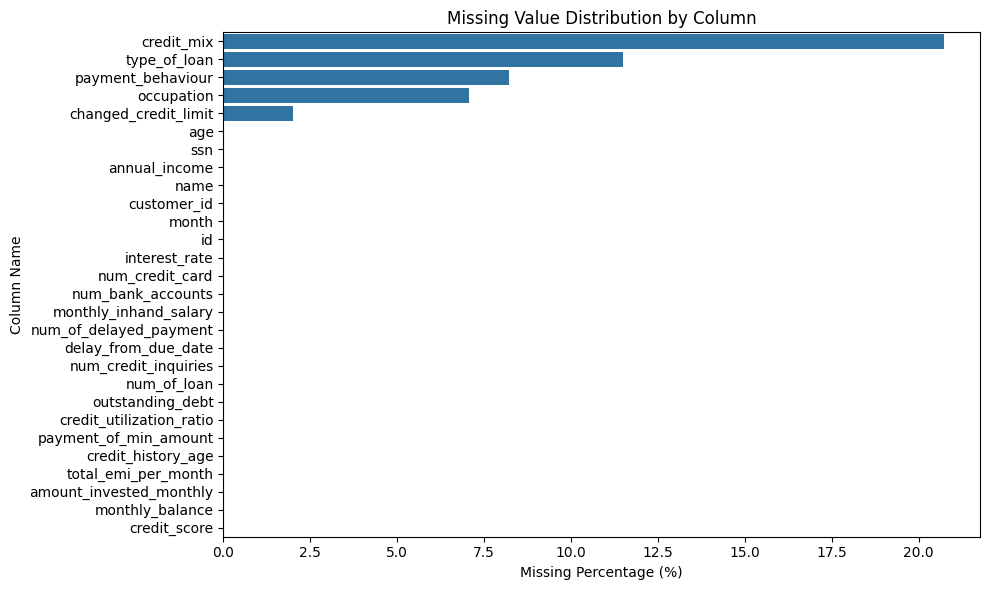

In [126]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_by_column.reset_index(),
            x='missing_percentage', y='index')
plt.title('Missing Value Distribution by Column')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Column Name')
plt.tight_layout()
plt.savefig('../outputs/figures/eda/missing_distribution_by_column.png')

#### Visualize missing data patterns

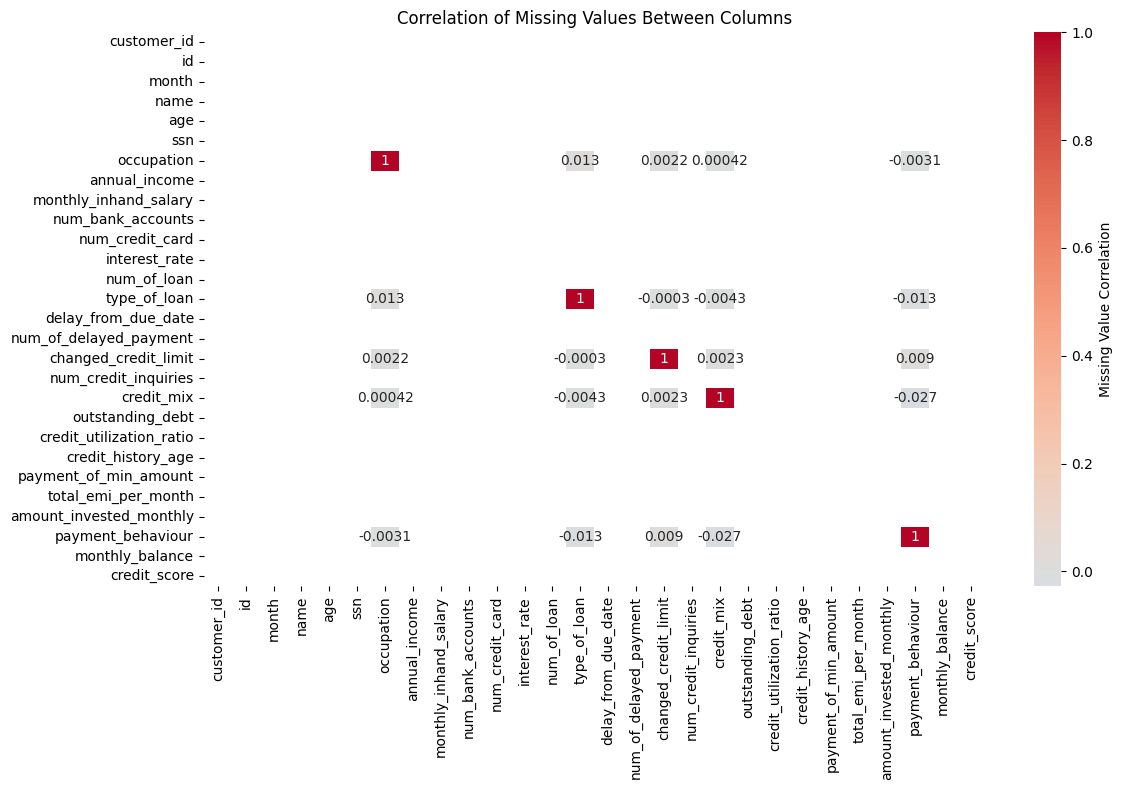

In [127]:
def visualize_missing_patterns(df):
    """Qualitative analysis - patterns and relationships in missingness"""

    # Method 2: Correlation of missingness
    missing_corr = df.isnull().corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0,
                cbar_kws={'label': 'Missing Value Correlation'})
    plt.title('Correlation of Missing Values Between Columns')
    plt.tight_layout()
    plt.savefig('../outputs/figures/eda/missing_correlation_heatmap.png')
    plt.show()

    return missing_corr

# Usage
missing_patterns = visualize_missing_patterns(df_train_full)

#### Determine Missingness Type

- Missingness Type: MCAR (Missing Completely at Random)
- Evidence: All correlations are near zero
- Implication: Missingness is random, not related to other variables

## **Section 5: Outlier Detection & Treatment**

### Identify outliers using histograms/boxplots for numerical features

In [128]:
print(f"df_train_full['id'].dtype: {df_train_full["id"].dtype}")

df_train_full['id'].dtype: object


#### Histogram visualization

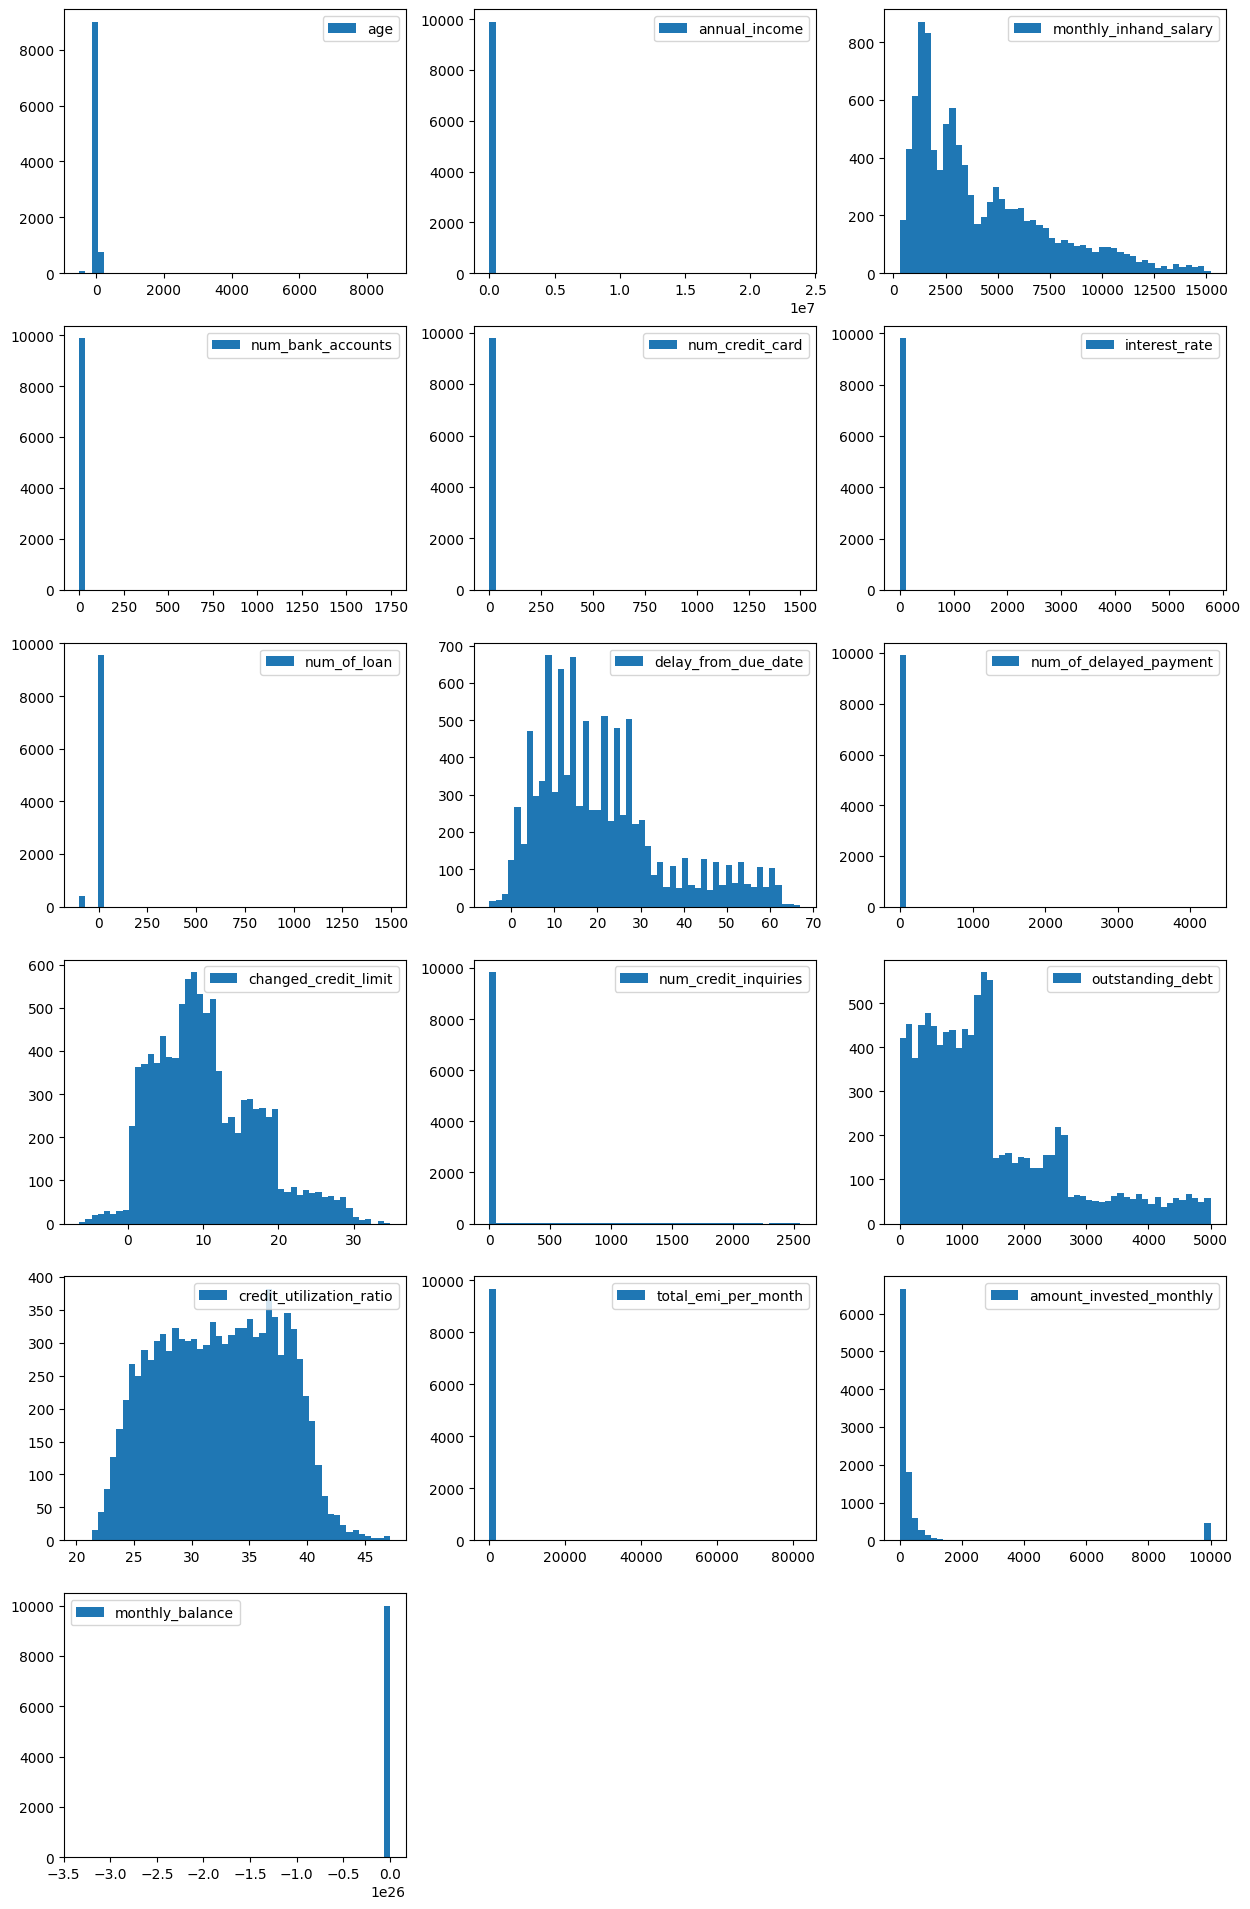

In [129]:
numerical_cols = df_train_full.select_dtypes(include=[np.number]).columns.to_list()

n = len(numerical_cols)
cols = 3
rows = (n + cols + 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))
for idx, num_column in enumerate(numerical_cols, start=1):
    plt.subplot(rows, cols, idx)
    plt.hist(df_train_full[num_column], bins=50, label=num_column)
    plt.legend()

plt.savefig('../outputs/figures/eda/outlier_boxplots.png')

#### Boxplot visualization

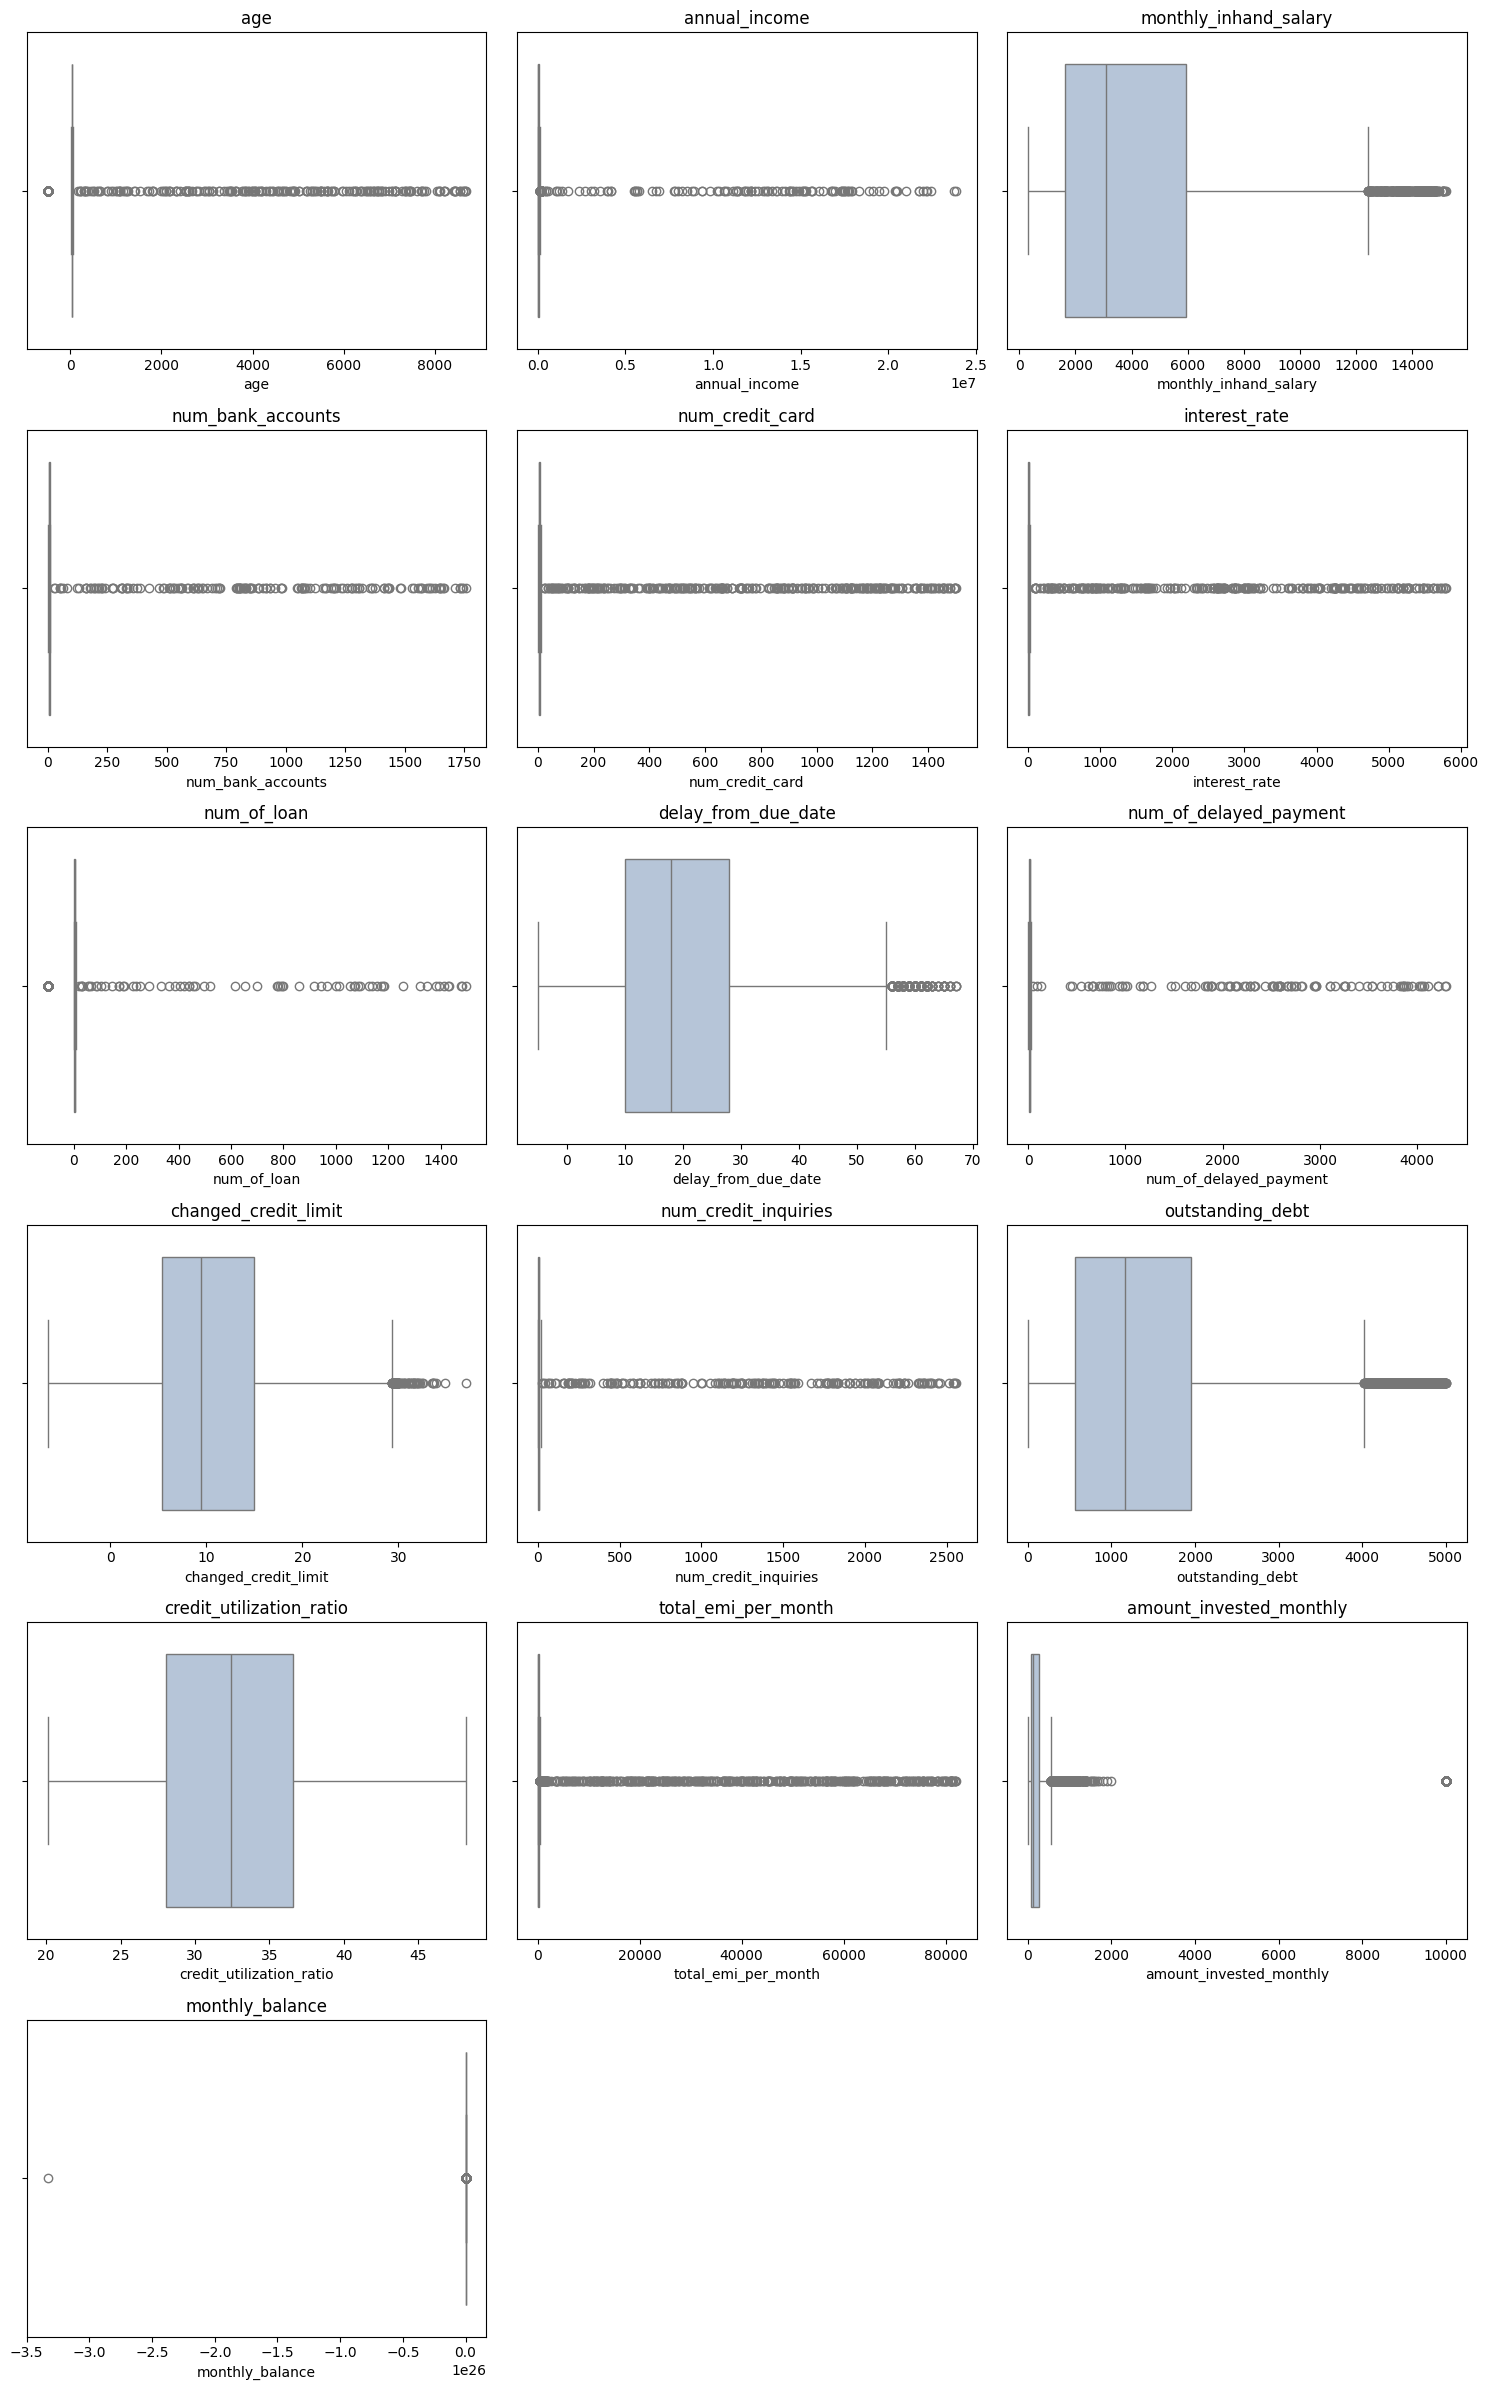

In [130]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Quick grid of boxplots
import math
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols) if n else 0
plt.figure(figsize=(5 * cols, 4 * max(1, rows)))
for i, c in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[c], orient="h", color="lightsteelblue")
    plt.title(c)
plt.tight_layout()
plt.show()

#### Outlier Detection Analysis

In [131]:
col = "num_bank_accounts"
print("Number of bank accounts")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 50:", (df_train_full[col] > 50).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q99 = df_train_full[col].quantile([0.95, 0.99]).tolist()
print("q95, q99:", q95, q99)

col = "num_credit_card"
print("\nNumber of credit cards")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 50:", (df_train_full[col] > 50).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)

Number of bank accounts
count    10000.000000
mean        16.980100
std        114.514105
min         -1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max       1747.000000
Name: num_bank_accounts, dtype: float64
Top values: [1747 1741 1733 1731 1712 1665 1654 1650 1647 1645 1616 1605 1595 1574
 1568 1564 1558 1540 1483 1480]
Count > 50: 129
q95, q99: 10.0 512.0200000000004

Number of credit cards
count    10000.000000
mean        22.652300
std        130.333451
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1499.000000
Name: num_credit_card, dtype: float64
Top values: [1499 1498 1498 1497 1493 1479 1477 1470 1458 1456 1450 1441 1436 1420
 1414 1407 1386 1381 1375 1374]
Count > 50: 226
q95, q98, q99: 10.0 171.18000000000393 863.1100000000024


In [132]:
col = "interest_rate"
print("\nInterest Rate")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 50:", (df_train_full[col] > 50).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)

col = "num_of_loan"
print("\nNumber of Loan")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 50:", (df_train_full[col] > 50).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


Interest Rate
count    10000.000000
mean        70.337600
std        457.809691
min          1.000000
25%          8.000000
50%         14.000000
75%         20.000000
max       5773.000000
Name: interest_rate, dtype: float64
Top values: [5773 5722 5709 5663 5616 5615 5548 5521 5485 5473 5469 5469 5285 5277
 5272 5264 5241 5201 5199 5198]
Count > 50: 203
q95, q98, q99: 33.0 101.10000000000218 2711.130000000003

Number of Loan
count    10000.000000
mean         2.729800
std         60.521527
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1495.000000
Name: num_of_loan, dtype: float64
Top values: [1495 1478 1433 1430 1412 1348 1182 1181 1159 1127 1085 1074 1070 1053
 1014  999  945  917  860  799]
Count > 50: 48
q95, q98, q99: 8.0 9.0 9.0


In [133]:
col = "num_of_delayed_payment"
print("\nNumber of Delayed Payments")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 30:", (df_train_full[col] > 50).sum())
print("Count < 0:", (df_train_full[col] < 0).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)

col = "changed_credit_limit"
print("\nChanged Credit Limit")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
print("Count > 50:", (df_train_full[col] > 50).sum())
print("Count < 0:", (df_train_full[col] < 0).sum())
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


Number of Delayed Payments
count    10000.000000
mean        33.421100
std        238.994377
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4281.000000
Name: num_of_delayed_payment, dtype: float64
Top values: [4281 4216 4211 4069 4053 4042 4019 3951 3900 3881 3865 3864 3858 3845
 3827 3750 3684 3488 3404 3316]
Count > 30: 87
Count < 0: 67
q95, q98, q99: 24.0 25.0 27.0

Changed Credit Limit
count    9799.000000
mean       10.459006
std         6.824425
min        -6.490000
25%         5.380000
50%         9.430000
75%        15.020000
max        34.850000
Name: changed_credit_limit, dtype: float64
Top values: [34.85 33.85 33.74 33.61 33.54 33.48 32.22 32.18 31.99 31.94 31.92 31.86
 31.66 31.6  31.59 31.58 31.45 31.26 31.07 31.04]
Count > 50: 0
Count < 0: 165
q95, q98, q99: 23.77 27.31039999999999 28.810200000000002


In [134]:
col = "num_credit_inquiries"
print("\nNumber Of Credit Inquiries")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


col = "outstanding_debt"
print("\nOutstanding Debt")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


Number Of Credit Inquiries
count    10000.000000
mean        27.408400
std        186.490525
min          0.000000
25%          4.000000
50%          6.000000
75%         10.000000
max       2554.000000
Name: num_credit_inquiries, dtype: float64
Top values: [2554. 2544. 2536. 2511. 2457. 2446. 2444. 2407. 2406. 2389. 2376. 2362.
 2358. 2348. 2342. 2331. 2328. 2246. 2241. 2213.]
q95, q98, q99: 14.0 17.0 1104.090000000002

Outstanding Debt
count    10000.000000
mean      1431.817190
std       1159.718923
min          0.230000
25%        572.455000
50%       1164.140000
75%       1960.315000
max       4998.070000
Name: outstanding_debt, dtype: float64
Top values: [4998.07 4997.1  4997.05 4992.25 4990.91 4986.03 4983.86 4982.57 4980.31
 4975.63 4974.81 4974.31 4973.64 4973.13 4972.87 4972.4  4969.7  4969.21
 4968.99 4968.17]
q95, q98, q99: 4073.4249999999997 4649.4128 4814.152000000002


In [135]:
col = "total_emi_per_month"
print("\nMonthly Equated Monthly Installment (EMI)")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
df_train_full.loc[df_train_full[col] > 50, ['customer_id','age','annual_income',col]].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


col = "amount_invested_monthly"
print("\nAmount Invested Monthly")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
df_train_full.loc[df_train_full[col] > 50].head(10)
q95, q98, q99 = df_train_full[col].quantile([0.95, 0.98, 0.99]).tolist()
print("q95, q98, q99:", q95, q98, q99)


Monthly Equated Monthly Installment (EMI)
count    10000.000000
mean      1435.882665
std       8329.611494
min          0.000000
25%         31.452282
50%         72.881575
75%        169.988255
max      81971.000000
Name: total_emi_per_month, dtype: float64
Top values: [81971. 81935. 81760. 81751. 81540. 81257. 81125. 81050. 80768. 80311.
 79971. 79792. 79403. 79381. 79153. 78446. 78278. 78239. 77407. 77237.]
q95, q98, q99: 589.262315754418 29386.70000000006 56627.03

Amount Invested Monthly
count    10000.000000
mean       639.605146
std       2052.993583
min          0.000000
25%         73.438566
50%        133.495356
75%        261.809252
max      10000.000000
Name: amount_invested_monthly, dtype: float64
Top values: [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
q95, q98, q99: 1153.9747109114312 10000.0 10000.0


In [136]:
col = "monthly_balance"
print("\nMonthly Balance")

print(df_train_full[col].describe())
print("Top values:", df_train_full[col].nlargest(20).values)
df_train_full.loc[df_train_full[col] > 50].head(10)
q1, q95, q98, q99 = df_train_full[col].quantile([0.01, 0.95, 0.98, 0.99]).tolist()
print("q1, q95, q98, q99:", q1, q95, q98, q99)

# Calculate IQR-based bounds
Q1 = df_train_full[col].quantile(0.25)
Q3 = df_train_full[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

print(f"\nQ1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound (Q1 - 3*IQR): {lower_bound:.2f}")
print(f"Upper bound (Q3 + 3*IQR): {upper_bound:.2f}")

# Find extreme outliers
extreme_low = df_train_full[df_train_full[col] < lower_bound]
extreme_high = df_train_full[df_train_full[col] > upper_bound]

print(f"\nExtreme low outliers (< {lower_bound:.2f}): {len(extreme_low)} rows")
print(f"Extreme high outliers (> {upper_bound:.2f}): {len(extreme_high)} rows")

if len(extreme_low) > 0:
    print(f"\nExtreme low values sample:")
    print(extreme_low[['customer_id', col, 'annual_income', 'monthly_inhand_salary']].head())

if len(extreme_high) > 0:
    print(f"\nExtreme high values sample:")
    print(extreme_high[['customer_id', col, 'annual_income', 'monthly_inhand_salary']].head())

p99 = df_train_full[col].quantile(0.99)




Monthly Balance
count    1.000000e+04
mean    -3.333333e+22
std      3.333333e+24
min     -3.333333e+26
25%      2.691001e+02
50%      3.402266e+02
75%      4.753719e+02
max      1.463792e+03
Name: monthly_balance, dtype: float64
Top values: [1463.79232752 1434.12824585 1422.56752271 1403.01452284 1396.88185494
 1390.73779716 1390.25525814 1383.98151153 1376.32669255 1373.11124126
 1364.17163856 1356.7285722  1351.73569728 1348.87488049 1344.98486114
 1339.85974391 1339.08294345 1334.61196588 1333.49500482 1328.93819528]
q1, q95, q98, q99: 70.32707594036478 864.1639930091552 1030.7049973992043 1121.2633451106697

Q1: 269.10
Q3: 475.37
IQR: 206.27
Lower bound (Q1 - 3*IQR): -349.72
Upper bound (Q3 + 3*IQR): 1094.19

Extreme low outliers (< -349.72): 1 rows
Extreme high outliers (> 1094.19): 129 rows

Extreme low values sample:
     customer_id  monthly_balance  annual_income  monthly_inhand_salary
3035  CUS_0x2f7e    -3.333333e+26      126353.04               10635.42

Extreme high valu

#### Categorical Feature Analysis

In [137]:
categorical_cols = df_train_full.select_dtypes(include="object").columns.to_list()

for col in categorical_cols:
    print(f"\nColumn Name: {col}")
    print(f"Unique values: {df_train_full[col].nunique()}")
    print(f"Top values:\n{df_train_full[col].value_counts().head(5)}")
    missing = df_train_full[col].isnull().sum()
    print(f"Missing: {missing} ({missing / len(df_train_full) * 100})")


Column Name: customer_id
Unique values: 10000
Top values:
customer_id
CUS_0x2ff6    1
CUS_0xa422    1
CUS_0x2748    1
CUS_0x8a62    1
CUS_0x661d    1
Name: count, dtype: int64
Missing: 0 (0.0)

Column Name: id
Unique values: 10000
Top values:
id
0x188b9    1
0x1e1b1    1
0x1b0a9    1
0xafed     1
0x13bfd    1
Name: count, dtype: int64
Missing: 0 (0.0)

Column Name: month
Unique values: 1
Top values:
month
August    10000
Name: count, dtype: int64
Missing: 0 (0.0)

Column Name: name
Unique values: 8438
Top values:
name
Jessicad              6
Stevex                5
Nicko                 5
Andreaj               5
Deepa Seetharamanm    5
Name: count, dtype: int64
Missing: 0 (0.0)

Column Name: ssn
Unique values: 9447
Top values:
ssn
#F%$D@*&8      554
144-58-9585      1
302-80-4643      1
384-92-1465      1
253-27-5552      1
Name: count, dtype: int64
Missing: 0 (0.0)

Column Name: occupation
Unique values: 15
Top values:
occupation
Lawyer        650
Scientist     648
Accountant    637


In [138]:
print("\n" + "="*50)
print("CATEGORICAL VALUE ANALYSIS")
print("="*50)

for col in categorical_cols:
    value_counts = df_train_full[col].value_counts()
    value_percent = df_train_full[col].value_counts(normalize=True) * 100

    print(f"\n{col}:")
    print(f"Unique values: {df_train_full[col].nunique()}")
    print(f"Top 5 categories:")
    for i, (val, count) in enumerate(value_counts.head(5).items()):
        print(f"  {i+1}. {val}: {count} ({value_percent[val]:.1f}%)")

    # Identify rare categories (less than 1%)
    rare_categories = value_percent[value_percent < 1].index.tolist()
    if rare_categories:
        print(f"⚠️  Rare categories (<1%): {rare_categories}")


CATEGORICAL VALUE ANALYSIS

customer_id:
Unique values: 10000
Top 5 categories:
  1. CUS_0x2ff6: 1 (0.0%)
  2. CUS_0xa422: 1 (0.0%)
  3. CUS_0x2748: 1 (0.0%)
  4. CUS_0x8a62: 1 (0.0%)
  5. CUS_0x661d: 1 (0.0%)
⚠️  Rare categories (<1%): ['CUS_0x2ff6', 'CUS_0xa422', 'CUS_0x2748', 'CUS_0x8a62', 'CUS_0x661d', 'CUS_0x1585', 'CUS_0x5172', 'CUS_0xabea', 'CUS_0x1758', 'CUS_0x72b6', 'CUS_0x7500', 'CUS_0x4203', 'CUS_0x9939', 'CUS_0x44d2', 'CUS_0x53f7', 'CUS_0x835', 'CUS_0x8d6b', 'CUS_0x2734', 'CUS_0x559e', 'CUS_0x689c', 'CUS_0x3752', 'CUS_0x10f9', 'CUS_0x628d', 'CUS_0xa090', 'CUS_0x57b1', 'CUS_0x663e', 'CUS_0x2358', 'CUS_0x9ce8', 'CUS_0x42c6', 'CUS_0x8973', 'CUS_0x9534', 'CUS_0xaad7', 'CUS_0x5c2d', 'CUS_0xb2fc', 'CUS_0x50ef', 'CUS_0x85ba', 'CUS_0x66e0', 'CUS_0x1041', 'CUS_0xbbc6', 'CUS_0x8cc8', 'CUS_0x48a6', 'CUS_0xb518', 'CUS_0xd40', 'CUS_0xc71f', 'CUS_0x1b8a', 'CUS_0x7b2c', 'CUS_0x30ae', 'CUS_0xc049', 'CUS_0x4e38', 'CUS_0x6c99', 'CUS_0xc4bd', 'CUS_0x4f13', 'CUS_0x8fa8', 'CUS_0x944', 'CUS_0x6

#### Business Rules & Domain Constraints Analysis

In [139]:
# Business Logic Outliers
print("\n" + "="*50)
print("BUSINESS LOGIC OUTLIER CHECKS")
print("="*50)

# Check for out-of-range values
invalid_age_low = (df_train_full["age"] < 18).sum()
invalid_age_high = (df_train_full["age"] > 80).sum()
print(f"\nAge < 18: {invalid_age_low}")
print(f"Age > 80: {invalid_age_high}")

# Calculate acceptable range (1st-99th percentile + business logic)
age_p1 = df_train_full['age'].quantile(0.01)
age_p99 = df_train_full['age'].quantile(0.99)
print(f"1st percentile for the 'Age' column: {age_p1}")
print(f"99th percentile  for the 'Age' column: {age_p99}\n")


BUSINESS LOGIC OUTLIER CHECKS

Age < 18: 621
Age > 80: 168
1st percentile for the 'Age' column: 14.0
99th percentile  for the 'Age' column: 3641.9400000000423



In [140]:
# Negative values check
negative_check_cols = df_train_full.select_dtypes(include=[np.number]).columns.to_list()
for col in negative_check_cols:
    negative_count = (df_train_full[col] < 0).sum()
    if negative_count > 0:
        print(f"❌ Negative values in {col}: {negative_count}")

❌ Negative values in age: 84
❌ Negative values in num_bank_accounts: 4
❌ Negative values in num_of_loan: 398
❌ Negative values in delay_from_due_date: 67
❌ Negative values in num_of_delayed_payment: 67
❌ Negative values in changed_credit_limit: 165
❌ Negative values in monthly_balance: 1


The column `delay_from_due_date` can include negative values. It means that the payments pay in advance.

## Section 6: Document Column-by-Column Strategy & Save Configuration

### **Key Column Characteristics Summary**

#### **Identifiers & PII (DROP)**
- `name`, `ssn`, `customer_id`, `id`, `month` → Not useful for modeling, privacy risks

#### **Financial Metrics (KEEP/IMPUTE/CAP)**
- `annual_income`, `monthly_inhand_salary`, `outstanding_debt`, `total_emi_per_month` → Core financial indicators

#### **Credit Behavior (KEEP/IMPUTE/CAP)**
- `credit_score`, `credit_history_age`, `credit_mix`, `credit_utilization_ratio` → Directly related to creditworthiness

#### **Payment Behavior (KEEP/IMPUTE)**
- `payment_behaviour`, `payment_of_min_amount`, `num_of_delayed_payment` → Historical payment patterns

#### **Account Activity (CAP)**
- `num_bank_accounts`, `num_credit_card`, `num_of_loan`, `num_credit_inquiries` → Count-based features requiring outlier handling

#### **Recent Behavior (KEEP/IMPUTE)**
- `monthly_balance`, `amount_invested_monthly`, `delay_from_due_date` → Recent financial snapshots

###  Create Comprehensive Strategy Table

#### Quick Decision Tree

```text
Is it categorical?
├─ YES → use MODE (or "Unknown"?)
└─ NO (numerical)
   ├─ Does missing mean "absent/none"? (count, delay, flag, num_of_loan)
   │  └─ YES → use 0
   └─ NO → use MEDIAN (safer default than mean)
```

| Column                   | Missing % | Action                    | Reason                                                      | Description                                          |
| ------------------------ | --------- | ------------------------- | ----------------------------------------------------------- | ---------------------------------------------------- |
| name | - | **DROP**                  | Not predictive, privacy concern (PII)                       | Customer's full name (string)                        |
| ssn                      | -         | **DROP**                  | Privacy concern, not useful for prediction (PII)            | Social Security Number (string identifier)           |
| customer_id              | 0%        | **KEEP**                  | Identifier (drop before modeling)                           | Unique identifier for each customer                  |
| id                       | 0%        | **DROP**                  | Identifier with data quality issues                         | Identifier column containing garbage/malformed data  |
| month                    | -         | **DROP**                  | August is the only value in dataset (no variance)           | Month of data snapshot (categorical: January–August) |
| occupation               | 7%        | **IMPUTE + ENCODE** | Categorical, create new category "Unknown" for missing | Customer's occupation/job title (string)             |
| age                      | 0%        | **CAP outliers**          | Numerical, valid range 18–80; cap to 1st/99th percentile    | Customer's age in years (integer)                    |
| annual_income            | 0%        | **CAP outliers**          | Important financial feature; cap to 99th percentile         | Annual income (float)                                |
| monthly_inhand_salary    | 0%        | -                         | Can cross-validate with annual_income; validate consistency | Monthly salary/take-home pay                         |
| num_bank_accounts        | 0%        | **CAP outliers**          | Count cannot be <0; cap to 95th percentile                  | Number of bank accounts                              |
| num_credit_card          | 0%        | **CAP outliers**          | Count cannot be <0; cap to 95th percentile                  | Number of credit cards                               |
| interest_rate            | 0%        | **CAP outliers**          | Important financial metric; cap to 95th percentile          | Interest rate (%)                                    |
| num_of_loan              | 0%        | **CAP outliers**          | Count cannot be <0; cap to 95th percentile                  | Number of active loans                               |
| type_of_loan             | 11%       | **IMPUTE + ENCODE** | Missing likely means no loans; create default category, impute with "No_Loan". Apply one-hot encoding | Types of loans held                                  |
| delay_from_due_date      | 0%        | **KEEP**                  | Can be negative for early payments; no capping needed       | Days delayed from due date                           |
| num_of_delayed_payment   | 0%        | **CAP outliers**          | Valid range 0–50; cap to 1st/99th percentile                | Count of delayed payments                            |
| changed_credit_limit     | 2%        | **IMPUTE + CAP outliers** | Replace missing with median; cap to 99th percentile         | Times credit limit changed                           |
| num_credit_inquiries     | 0%        | **CAP outliers**          | Indicates credit-seeking; cap to 98th percentile            | Number of credit inquiries                           |
| credit_mix               | 20%       | **IMPUTE + ENCODE** | Categorical credit diversity indicator, impute with "Unknown". Apply encoding. | Mix of credit types                                  |
| outstanding_debt         | 0%        | **LOG1P**                  | Key financial metric; log1p stabilizes tail                     | Total outstanding debt                               |
| credit_utilization_ratio | 0%        | **KEEP**                  | Indicates credit usage                                      | Credit utilization ratio                             |
| credit_history_age       | 0%        | **CONVERT**               | Convert "X Years and Y Months" → total months               | Credit history duration (string)                     |
| payment_of_min_amount    | 0%        | **ENCODE**                  | Behavioral indicator,                                        | Whether customer pays minimum amount                 |
| total_emi_per_month      | 0%        | **LOG1P**    | Extreme right tail; log1p required | Monthly Equated Monthly Installment (EMI) total, represents monthly debt obligations |
| amount_invested_monthly  | 0%        | **LOG1P**    | Extreme right tail; log1p required | Monthly investment amount, indicates savings/investment activity |
| payment_behaviour        | 8%        | **IMPUTE + ENCODE**      | Replace NA with "Unknown", apply encoding:High_spent_Small_value_payments → payment_behaviour_High_spent_Small_value (True/False) | Payment behavior pattern                             |
| monthly_balance          | 0%        | **CAP outliers**    | Valid from 0, clip upper values with p99 (monthly_balance.clip(lower=0, upper=q99)) | Current monthly bank balance, indicates liquidity                         |
| credit_score             | 0%        | **TARGET**                | Target variable                                             | Credit score rating (Good, Poor, Standard)           |


### Save Column Drop List

In [141]:
# Columns to drop (decided from train_full analysis)
columns_to_drop = ["name", "ssn", "id", "month"]

# Save configuration
with open('../data/interim/columns_to_drop.json', 'w') as f:
    json.dump(columns_to_drop, f)

### Define and Save Acceptable Ranges

In [142]:
cleaning_config = {}

In [143]:
cleaning_config["categorical_columns"] = [
    "occupation",
    "type_of_loan",
    "credit_mix",
    "payment_behaviour",
    "payment_of_min_amount"
]

In [144]:
cleaning_config["categorical_impute_values"] = {
    "occupation": "Unknown",
    "type_of_loan": "No_Loan",
    "credit_mix": "Unknown",
    "payment_behaviour": "Unknown"
}

In [145]:
# Calculate percentiles from train_full for capping
cleaning_config["numerical_clipping_values"]= {
    'age_min': max(18, df_train_full['age'].quantile(0.01)),
    'age_max': min(80, df_train_full['age'].quantile(0.99)),

    'num_bank_accounts_max': df_train_full['num_bank_accounts'].quantile(0.99),
    'num_credit_card_max': df_train_full['num_credit_card'].quantile(0.99),

    'interest_rate_min': 0,
    'interest_rate_max': df_train_full['interest_rate'].quantile(0.99),
    
    'num_of_loan_max': df_train_full['num_of_loan'].quantile(0.99),
    'delay_from_due_date_max': df_train_full['delay_from_due_date'].quantile(0.99),
    'num_of_delayed_payment_max': df_train_full['num_of_delayed_payment'].quantile(0.99),
    
    'annual_income_min': df_train_full['annual_income'].quantile(0.01),
    'annual_income_max': df_train_full['annual_income'].quantile(0.99)
}

# Save cleaning configuration
with open('../data/interim/cleaning_config.json', 'w') as f:
    json.dump(cleaning_config, f, indent=4)

print("✅ Cleaning configuration saved (calculated from train_full only)")

✅ Cleaning configuration saved (calculated from train_full only)


In [146]:
# ============================================================
# SECTION 6: Identifier Columns Decision
# ============================================================
# Identifier columns are NOT features - they're for tracking only
# Drop them before saving processed datasets

columns_to_drop = ["id", "ssn", "name", "month"]

print(f"Columns to drop (identifiers/PII): {columns_to_drop}")

# Save the decision for Notebook 2
import json
drop_decision = {
    "reason": "Identifiers and PII - not predictive features",
    "columns": columns_to_drop
}

with open("../data/interim/columns_to_drop.json", "w") as f:
    json.dump(drop_decision, f, indent=2)

print("✅ Drop decision saved to data/interim/columns_to_drop.json")

Columns to drop (identifiers/PII): ['id', 'ssn', 'name', 'month']
✅ Drop decision saved to data/interim/columns_to_drop.json


#### Define and Save Acceptable Ranges

In [147]:
# import re
# from collections import Counter
# import json

# def parse_loan_types(s):
#     if pd.isna(s) or str(s).strip() == "":
#         return []
#     # normalize separators: comma, semicolon, 'and', &, /
#     s2 = re.sub(r'\s*(?:and|&|/|;|\|)\s*', ',', str(s).lower())
#     parts = [p.strip().title() for p in s2.split(',') if p.strip()]
#     return parts

# counter = Counter()
# for v in df_train_full['type_of_loan'].dropna().astype(str):
#     counter.update(parse_loan_types(v))

# # keep top-K (or all if small)
# top_k = [t for t,_ in counter.most_common(20)]

# # Save to cleaning_config (train_full stat)
# with open('../data/interim/cleaning_config.json', 'r') as f:
#     cfg = json.load(f)
# cfg['type_of_loan_impute'] = 'No_Loan'
# cfg['type_of_loan_values'] = top_k
# cfg['type_of_loan_keep_top_k'] = len(top_k)
# with open('../data/interim/cleaning_config.json', 'w') as f:
#     json.dump(cfg, f, indent=2)

# # Update imputation_stats.json
# with open('../data/interim/imputation_stats.json', 'r') as f:
#     impute = json.load(f)
# impute['type_of_loan'] = 'No_Loan'
# with open('../data/interim/imputation_stats.json', 'w') as f:
#     json.dump(impute, f, indent=2)
# # ...existing code...